# Reinforcement Learning - Train

##### Original: [nicknochnack](https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning/blob/master/Deep%20Reinforcement%20Learning.ipynb)

#### Dependencies

In [1]:
#!pip install tensorflow==2.3.0
#!pip install gym
#!pip install keras
#!pip install keras-rl2

<a href="https://gym.openai.com/">
  <img src="https://gym.openai.com/assets/dist/footer/openai-logo-ce082f60cc.svg" 
  alt="Images" width="200">
</a>
<a href="https://gym.openai.com/">
  <img src="https://gym.openai.com/assets/dist/home/header/home-icon-54c30e2345.svg" 
  alt="Images" width="42">
</a>

> *Gym* ist ein Tool zur Entwicklung und zum Vergleich von **Reinforcement-Learning-Algorithmen**.

#### Was ist Reinforcement Learning?

> Reinforcement Learning (RL) ist ein Bereich des maschinellen Lernens, der sich damit befasst, wie intelligente Agenten in einer Umgebung Maßnahmen ergreifen sollten, um den Begriff der kumulativen Belohnung zu maximieren. Reinforcement Learning ist neben überwachtem Lernen und unüberwachtem Lernen eines von drei grundlegenden Arten des maschinellen Lernens.
$\rightarrow$ [Reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning)

##  CartPole-v1 Enviroment

> * [Enviroment](https://gym.openai.com/envs/CartPole-v1/)
> * [GitHub](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

<p align="center">
  <img src="images/CartPole.jpg" alt="drawing" width="420" align="center"/>
</p>

> * A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
> * The pendulum starts upright, and the goal is to prevent it from falling over.
> * The system is controlled by applying a force of +1 or -1 to the cart.
> * A reward of +1 is provided for every timestep that the pole remains upright.
> * The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

#### Enviroment Setup
        All observations are assigned a uniform random value in [-0.05..0.05]

In [2]:
import gym 
env = gym.make('CartPole-v1')

#### Observation
        Num     Observation               Min                     Max
        0       Cart Position             -2.4                    2.4
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.209 rad (-12 deg)    0.209 rad (12 deg)
        3       Pole Angular Velocity     -Inf                    Inf

In [3]:
states = env.observation_space.shape[0]
print(states)

4


#### Action
        Num   Action
        0     Push cart to the left
        1     Push cart to the right

In [4]:
actions = env.action_space.n
print(actions)

2


#### Reward
        Reward is 1 for every step taken, including the termination step
        
#### Done
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 out of center.
        Episode length is greater than 500.
        
        
<a href="https://gym.openai.com/docs/">
  <img src="https://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg" 
   alt="Images" width="300">
</a>

## Random Actions
> * `action = random.choice([0,1])` 
> $\rightarrow$ **action** wird über  `env.step(action)` an **Enviroment** übergeben.


> * `new_state, reward, done, info = env.step(action)`

In [5]:
import time
time.sleep(1)

import random
from numpy import mean
import matplotlib.pyplot as plt

episodes = 50
scores = []

for episode in range(1, episodes+1):
    
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        new_state, reward, done, info = env.step(action)
        score += reward
    scores.append(score)
env.close()

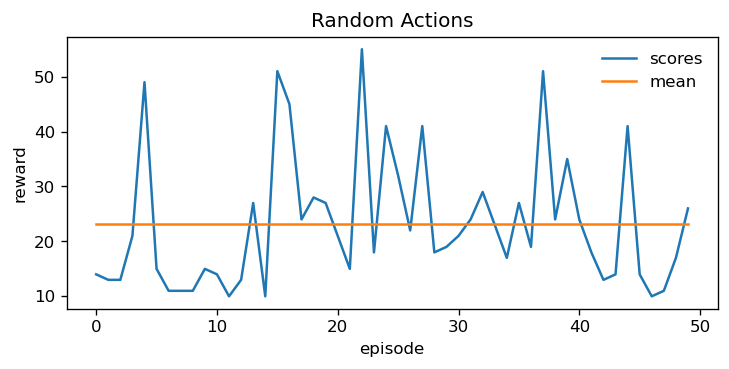

In [6]:
mean_reward = mean(scores)
fig, (ax1) = plt.subplots(1,1, figsize=(7,3),dpi=120)
ax1.plot(scores, label=r'scores')
ax1.plot([0,episodes-1],[mean_reward,mean_reward], label=r'mean')
ax1.set_title('Random Actions')
ax1.set_xlabel('episode')  
ax1.set_ylabel('reward')  
ax1.legend(loc=('best'), frameon=False, fontsize=10)
plt.savefig("images/RandomActions.png")

#### Reinforcement Learing Roadmap

> * Create a Deep Neural Network
> * Define the Agent's Memory and Policy
> * Build DQN-Agent
> * Train DQN-Agent

### Create a Deep Neural Network

<a href="https://keon.github.io/deep-q-learning/">
  <img src="https://keon.github.io/images/deep-q-learning/neuralnet.png" 
alt="Images" width="300">
</a>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

model = build_model(states, actions)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


### Define the Agent's Memory and Policy

#### Memory
> * Datenstruktur, welche die **Erfahrungen** des Agenten speichert.
> * Erfahrungen bestehen aus **`state, action, reward `** und **`next_state`**
> * Speicherkapazität stellt *Hyperparamter* dar. Wenn die Kapazität erreicht ist, werden alte Erfahrungen überschrieben. 

#### Policy
> Die *innere Politik* des Agenten beschreibt die Balance zwischen *Erforschung* und *Verwertung*. 
> $ \rightarrow $ *soll der Agent die bereits guten Resultate verwenden oder lieber neue, bessere Wege erforschen?*    

### Build DQN-Agent

#### Agent
> * Der **Agent** interargiert mit der Umgebung (**Enviroment**), indem er den `state` beobachtet und sich dann anhand seiner `policy` für eine `action` entscheidet, welche wiederum die Umgebung beeinflusst.


#### Deep Q-Learning
> * Während sich der Agent in seiner Umgebung bewegt, lernt er, den beobachteten Zustand der ausgeführten Aktion zuzuordnen.
> * Die Aktion wird basierend auf einen *Q-Wert* ausgewählt, welcher auf der erwarteten **höhsten langfristigen Belohnung** basiert.

In [8]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=80000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=20, target_model_update=1e-2)
    return dqn

#del model
model = build_model(states, actions)

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

## Train Agent

In [9]:
episodes = 60000
history = dqn.fit(env, nb_steps=episodes, visualize=False, verbose=1)

Training for 60000 steps ...
Interval 1 (0 steps performed)
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
    1/10000 [..............................] - ETA: 4:33 - reward: 1.0000

C:\Users\lenna\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 32s 3ms/step - reward: 1.0000
90 episodes - episode_reward: 110.822 [10.000, 420.000] - loss: 1.985 - mae: 20.037 - mean_q: 40.564

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 1.0000
38 episodes - episode_reward: 262.184 [183.000, 406.000] - loss: 2.263 - mae: 41.920 - mean_q: 84.607

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 1.0000
38 episodes - episode_reward: 264.789 [176.000, 475.000] - loss: 1.153 - mae: 43.537 - mean_q: 87.534

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 1.0000
31 episodes - episode_reward: 319.258 [223.000, 500.000] - loss: 1.064 - mae: 42.597 - mean_q: 85.583

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 33s 3ms/step - reward: 1.0000
22 episodes - episode_reward: 448.455 [204.000, 500.000] - loss:

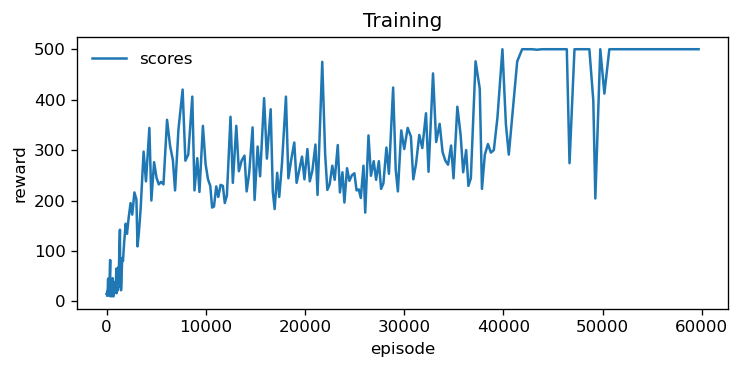

In [10]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,3),dpi=120)
ax1.plot(history.history['nb_steps'], history.history['episode_reward'], label=r'scores')
ax1.set_title('Training')
ax1.set_xlabel('episode')  
ax1.set_ylabel('reward')  
ax1.legend(loc=('best'), frameon=False, fontsize=10)
plt.savefig("images/Training.png")

## Test Agent

In [11]:
episodes = 10
scores = dqn.test(env, nb_episodes=episodes, visualize=False, verbose=0)

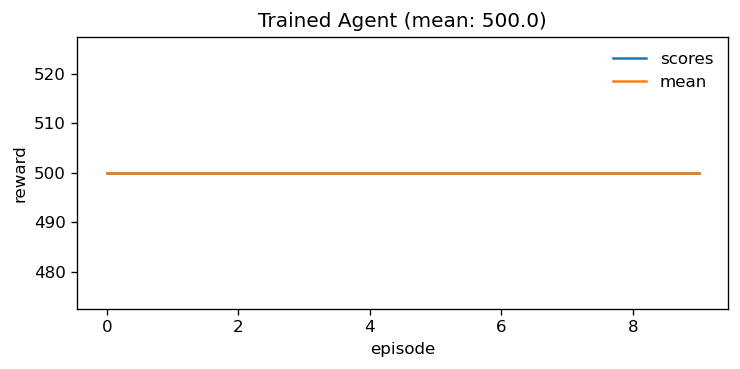

In [12]:
mean_reward = mean(scores.history['episode_reward'])
fig, (ax1) = plt.subplots(1,1, figsize=(7,3),dpi=120)
ax1.plot(scores.history['episode_reward'], label=r'scores')
ax1.plot([0,episodes-1],[mean_reward,mean_reward], label=r'mean')
ax1.set_title(f'Trained Agent (mean: {round(mean_reward,2)})')
ax1.set_xlabel('episode')
ax1.set_ylabel('reward')
ax1.legend(loc=('best'), frameon=False, fontsize=10)
plt.savefig("images/TrainedAgent.png")

In [13]:
time.sleep(1)
_ = dqn.test(env, nb_episodes=5, visualize=True, verbose=1)
env.close()

Testing for 5 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500


In [14]:
dqn.save_weights('weights/dqn_weights.h5f', overwrite=True)